In [1]:
%pylab inline
from CO2_sim_1D import CO2_1D

Populating the interactive namespace from numpy and matplotlib


In [9]:
n=20
x = linspace(0,5000,n)
z = linspace(0,1,n)
r = ones(n-1)
#r[5] = 0.5
sim = CO2_1D(x,z, init_radii=r, 
             Q_w=.2, 
             T_outside=0., 
             D_a=5., D_w=5.,
             adv_disp_stabil_factor=0.5)

In [10]:
sim.calc_flow_depths()
#sim.T_outside = 0
sim.calc_air_flow()
sim.calc_steady_adv_reaction()

0.7138513966455018
0.7138513966455018
0.7138513966455018
0.7138513966455018
0.7138513966455018
0.7138513966455018
0.7138513966455018
0.7138513966455018
0.7138513966455018
0.7138513966455018
0.7138513966455018
0.7138513966455018
0.7138513966455018
0.7138513966455018
0.7138513966455018
0.7138513966455018
0.7138513966455018
0.7138513966455018
0.7138513966455018
Air discharge =  0.5015398082198381  m^3/s
Timestep= 1
rel tol CO2_w= 0.3142853506295574   abs_tol_CO2_w= 0.3142853506295574
rel tol CO2_a= 1.6657186258327035   abs_tol_CO2_a= 0.16657186258327036
Timestep= 2
rel tol CO2_w= 0.2367721444003753   abs_tol_CO2_w= 0.16235812797819116
rel tol CO2_a= 0.36123497400668103   abs_tol_CO2_a= 0.07606085467075374
Timestep= 3
rel tol CO2_w= 0.11224796058595665   abs_tol_CO2_w= 0.08010073948331364
rel tol CO2_a= 0.2790485820784297   abs_tol_CO2_a= 0.06331873854992826
Timestep= 4
rel tol CO2_w= 0.08516571484015728   abs_tol_CO2_w= 0.0553998939366378
rel tol CO2_a= 0.23371797248682513   abs_tol_CO2_a

Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
rel tol CO2_w= 0.002727690805646539   abs_tol_CO2_w= 0.0013747142380869937
rel tol CO2_a= 0.002335344624813371   abs_tol_CO2_a= 0.0005308929140878105
rel tol Ca= 0.0010567989434099574   abs_tol_Ca= 0.0005284252991192284
Timestep= 174
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set

Warning! Low PCO2 outside of interpolation range is set to minimum from table.
rel tol CO2_w= 0.00015339175038153722   abs_tol_CO2_w= 8.97914642672415e-05
rel tol CO2_a= 9.58059786644372e-05   abs_tol_CO2_a= 1.378000703214366e-05
rel tol Ca= 0.0002384237925465306   abs_tol_Ca= 0.00011935849877275917
Timestep= 188
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
rel tol CO2_w= 0.0001366452522660269   abs_tol_CO2_w= 8.21230903944592e-05
rel tol CO2_a= 5.6866364579052414e-05   abs_tol_CO2_a= 1.2198341592217776e-05
rel tol Ca= 0.0002274997337216208   abs_tol_Ca= 0.00011392912711860603
Timestep= 189
Warning! Low PCO2 outside of interpolation range is 

rel tol CO2_w= 3.553832976647973e-05   abs_tol_CO2_w= 2.0801871979836406e-05
rel tol CO2_a= 2.158075763452291e-05   abs_tol_CO2_a= 4.306735862130706e-06
rel tol Ca= 8.057896166744788e-05   abs_tol_Ca= 4.034247053130713e-05
Timestep= 203
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
rel tol CO2_w= 3.4997328932516564e-05   abs_tol_CO2_w= 1.9125617621296165e-05
rel tol CO2_a= 2.4244115975020586e-05   abs_tol_CO2_a= 4.838349922431373e-06
rel tol Ca= 6.98211768039914e-05   abs_tol_Ca= 3.4959320409200245e-05
Timestep= 204
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range i

rel tol CO2_w= 9.276666014188533e-06   abs_tol_CO2_w= 5.03531158990711e-06
rel tol CO2_a= 7.301782234809984e-06   abs_tol_CO2_a= 1.6105121773968278e-06
rel tol Ca= 2.9382088668345047e-05   abs_tol_Ca= 1.4710719718924459e-05
Timestep= 218
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
rel tol CO2_w= 9.388072335304608e-06   abs_tol_CO2_w= 5.291389153949666e-06
rel tol CO2_a= 6.766020008883942e-06   abs_tol_CO2_a= 1.3658991963594325e-06
rel tol Ca= 2.4457153481987258e-05   abs_tol_Ca= 1.2245313980696615e-05
Timestep= 219
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range 

Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
rel tol CO2_w= 2.6617339509566127e-06   abs_tol_CO2_w= 1.5002352088400173e-06
rel tol CO2_a= 3.4855325842980264e-06   abs_tol_CO2_a= 7.329380831699872e-07
rel tol Ca= 8.127375756654792e-06   abs_tol_Ca= 4.069176304910549e-06
Full solution converged: n= 232


In [11]:
sim.pCO2_high*sim.CO2_w

array([0.00251368, 0.00261128, 0.00271395, 0.00281816, 0.00292663,
       0.00303755, 0.00315244, 0.00327037, 0.00339219, 0.00351748,
       0.00364671, 0.00377975, 0.00391688, 0.00405813, 0.00420365,
       0.00435359, 0.00450801, 0.00466717, 0.00483104, 0.005     ])

In [12]:
sim.Ca

array([0.50084221, 0.50079062, 0.5007363 , 0.50067937, 0.50061501,
       0.50054927, 0.50048119, 0.50041093, 0.50033564, 0.50025529,
       0.50017043, 0.50008349, 0.49999292, 0.49989758, 0.49979747,
       0.49969368, 0.49958613, 0.49947426, 0.49935785, 0.49847325])

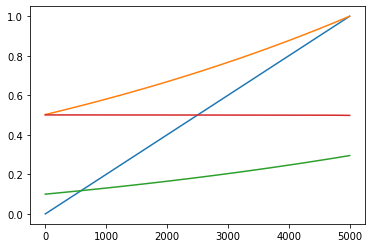

In [13]:
xmid = (x[1:] + x[:-1])/2.
#plot(x, sim.h)
plot(x,z)
#plot(xmid,sim.fd_mids)
plot(x,sim.CO2_w)
plot(x,sim.CO2_a)
plot(x,sim.Ca)


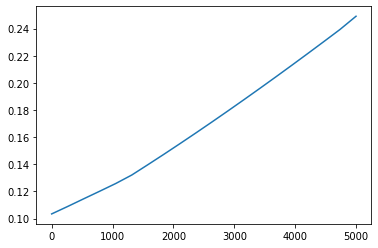

In [14]:
plot(x,sim.F)

In [ ]:
dt_stab[1:dt_stab.size]

In [ ]:
diff_bnd=0
sim.Lambda_w*(sim.CO2_a[1:] - sim.CO2_w[1:])

In [ ]:
diff_bnd=0
diff_bnd2=1

V_w = sim.V_w
V_w_mean = sim.V_w_mean
dx = sim.dx_ad
dt = sim.dt_ad
CO2_w = sim.CO2_w
CO2_a = sim.CO2_a
print((1./dt -(np.sign(V_w[0])*V_w[diff_bnd]/V_w_mean)/(2.*dx))*CO2_w[diff_bnd])

print(((np.sign(V_w[0])*V_w[diff_bnd]/V_w_mean)/(2*dx))*CO2_w[diff_bnd2])

In [ ]:
sim.bCO2_w

In [ ]:
np.sign(V_w[0])*(V_w[diff_bnd]/V_w_mean)

In [ ]:
V_w_mean